# Real Estate - Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [5]:
housing.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

In [6]:
housing['MEDV'].isnull().sum()

54

In [7]:
housing['MEDV'].mean()

23.750442477876106

In [8]:
housing['MEDV'].replace(np.NaN,housing['MEDV'].mean()).head(506)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [9]:
housing.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

In [10]:
housing['MEDV'].isnull().sum()


54

In [11]:
housing['MEDV'].replace(np.NaN,housing['MEDV'].mean()).head(378)

0      24.000000
1      21.600000
2      34.700000
3      33.400000
4      36.200000
         ...    
373    23.750442
374    23.750442
375    23.750442
376    23.750442
377    13.300000
Name: MEDV, Length: 378, dtype: float64

In [12]:
housing['MEDV'].isnull().sum()


54

In [13]:
housing.dropna(inplace = True)
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   CHAS     452 non-null    float64
 4   NOX      452 non-null    float64
 5   RM       452 non-null    float64
 6   AGE      452 non-null    float64
 7   DIS      452 non-null    float64
 8   RAD      452 non-null    int64  
 9   TAX      452 non-null    float64
 10  PTRATIO  452 non-null    float64
 11  B        452 non-null    float64
 12  LSTAT    452 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 53.0 KB


In [15]:
housing['CHAS'].value_counts()

0.0    417
1.0     35
Name: CHAS, dtype: int64

In [16]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [17]:
%matplotlib inline

In [18]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C906370>,
      dtype=object)

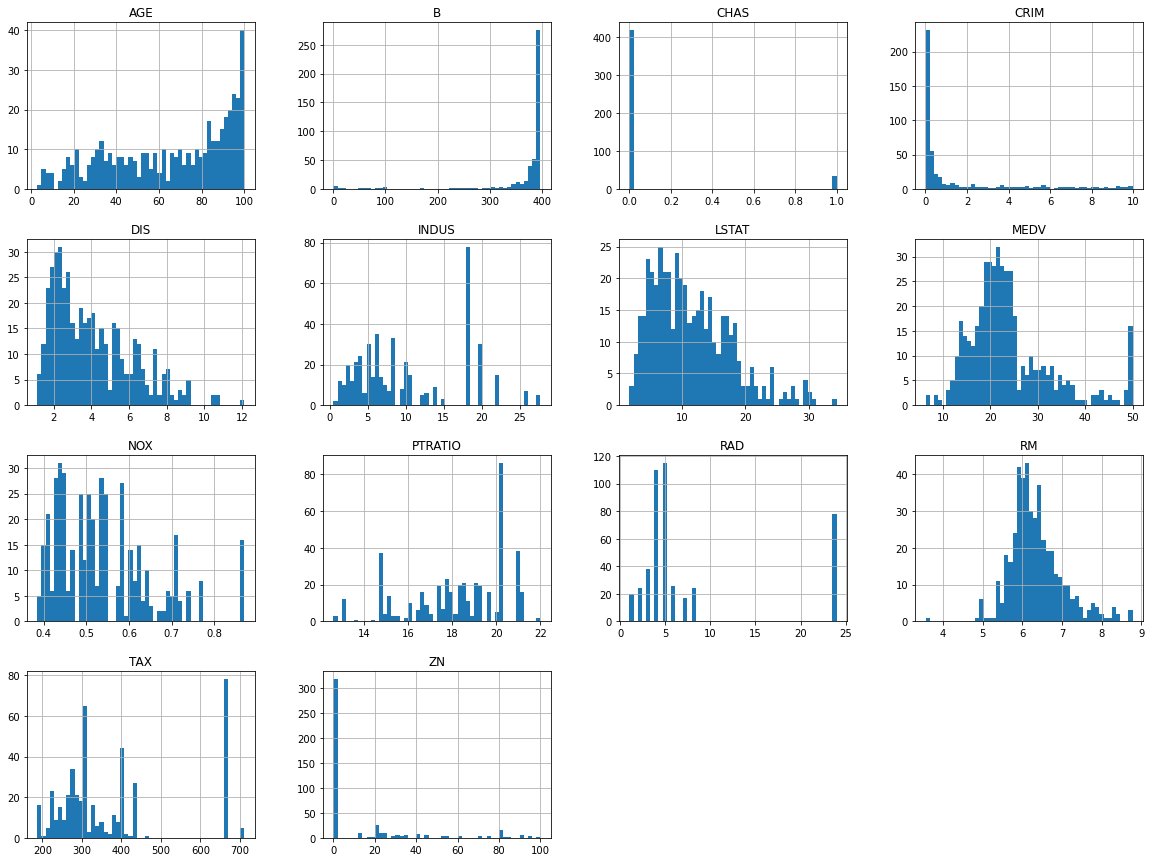

In [19]:
housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [20]:
# For learning Purpose
import numpy as np
from sklearn.model_selection import train_test_split
def split_train_test(data, test_ratio):
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data) * test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    

In [21]:
# train_set, test_set=split_train_test(housing, 0.2)

In [22]:
# print(f"Rows in train set: {len(train_set)} \nRows in test set: {len(test_set)}\n")

In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)} \nRows in test set: {len(test_set)}\n")

Rows in train set: 361 
Rows in test set: 91



In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(housing, housing['CHAS']):
#     print(train_index, test_index)
#     strat_train_set = housing.loc[ train_index]
#     strat_test_set = housing.loc[test_index]
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, random_state=42, stratify=housing["CHAS"])

In [25]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4,711.0,20.1,344.05,23.97,7.0
213,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4,277.0,18.6,385.81,9.38,28.1
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37,12.5
221,0.40771,0.0,6.20,1.0,0.507,6.164,91.3,3.0480,8,307.0,17.4,395.24,21.46,21.7
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3,469.0,21.1,396.90,14.80,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4,243.0,16.8,396.90,8.43,23.4
176,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5,296.0,16.6,393.23,10.11,23.2
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2,329.0,12.6,392.20,6.62,34.6
194,0.01439,60.0,2.93,0.0,0.401,6.604,18.8,6.2196,1,265.0,15.6,376.70,4.38,29.1


In [26]:
# To store the copy of first dataset(original)
# housing = strat_train.copy()

## Looking For Correlations


In [27]:
corr_matrix = housing.corr()

In [28]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.740181
ZN         0.331570
B          0.264797
CHAS       0.154409
DIS        0.138798
RAD       -0.217902
CRIM      -0.286245
AGE       -0.299893
NOX       -0.332778
TAX       -0.345898
INDUS     -0.411915
PTRATIO   -0.461214
LSTAT     -0.706255
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0EF5DBF8>,
      dtype=object)

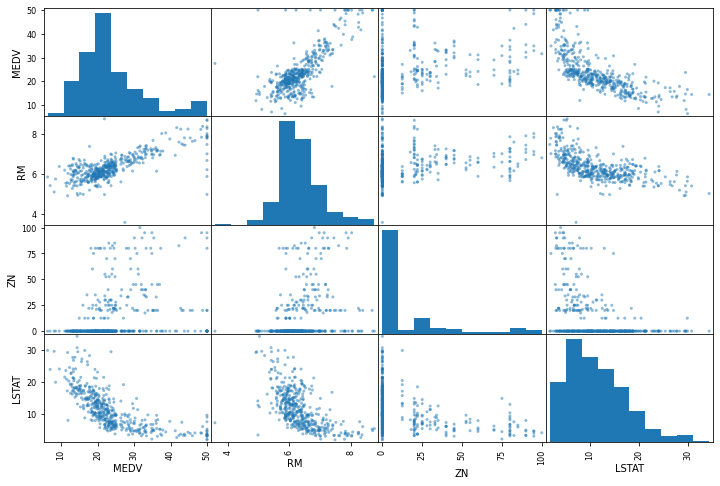

In [29]:
from pandas.plotting import scatter_matrix
attributes=["MEDV", "RM","ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize= (12,8))

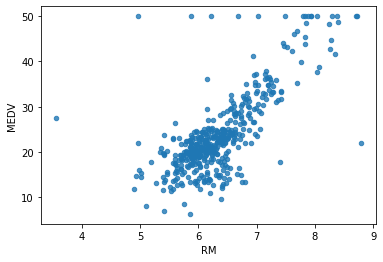

In [30]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Attribute Combinations

In [31]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]


In [32]:
# housing["TAXRM"]
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,31.061984


In [33]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.740181
ZN         0.331570
B          0.264797
CHAS       0.154409
DIS        0.138798
RAD       -0.217902
CRIM      -0.286245
AGE       -0.299893
NOX       -0.332778
TAX       -0.345898
INDUS     -0.411915
TAXRM     -0.443257
PTRATIO   -0.461214
LSTAT     -0.706255
Name: MEDV, dtype: float64

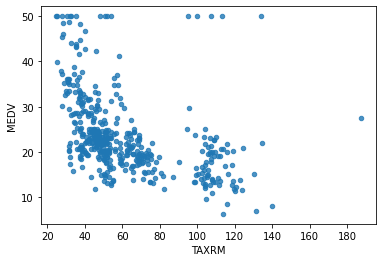

In [34]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [35]:
housing=strat_train_set.drop("MEDV", axis=1)
housing_labels=strat_train_set["MEDV"].copy()


In [36]:
# housing_labels

## Missing Attributes

To take care of missing attributes ,We have three options:

    1.Get rid of the missing data points
    2.Get rid of the whole attribute
    3.Set the value to some attribute(0,mean,median)
    
Option 1:
   a=housing.dropna(subset["RM"])
   
   a.shape

Option 2:
    housing.drop("RM", axis=1).shape
    
    Note that there is no RM column 
    
Option 3:Compute median
     median=housing["RM"].median()
     
     housing["RM"].fillna(median)

## Imputing for calculating missing data

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)


SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([2.0746e-01, 0.0000e+00, 8.1400e+00, 0.0000e+00, 5.2400e-01,
       6.2190e+00, 7.3100e+01, 3.4952e+00, 5.0000e+00, 3.1100e+02,
       1.8600e+01, 3.9183e+02, 1.0450e+01])

In [39]:
X = imputer.transform(housing)

In [40]:
housing_tr=pd.DataFrame(X, columns=housing.columns)

In [41]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,1.440614,12.016620,10.569114,0.077562,0.543789,6.324285,65.938781,3.988770,7.975069,381.360111,18.268975,369.109668,11.603407
std,2.465353,23.060723,6.822852,0.267853,0.113970,0.663155,28.304069,2.085498,7.582285,151.719013,2.157205,70.586287,6.225459
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.081990,0.000000,4.930000,0.000000,0.448000,5.913000,41.100000,2.353400,4.000000,277.000000,16.900000,378.250000,6.590000
50%,0.207460,0.000000,8.140000,0.000000,0.524000,6.219000,73.100000,3.495200,5.000000,311.000000,18.600000,391.830000,10.450000
75%,1.232470,20.000000,18.100000,0.000000,0.605000,6.631000,91.800000,5.287300,7.000000,430.000000,20.200000,395.690000,15.370000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000


## Scikit-Learn Design

Primariliy three typoes of objects:
1.Estimators: It estimates some parameter based on dataset.Eg.imputer.
it has a fit and transform method.
Fit method- Fits the dataset and calculates internal parameters.

2.Transformers:transform method takes input and returns output based on he learnings from fit()

3.Predictors:LinearRegression is an example of Predictor.fit() and predict() are two  common functions.It also gives score() function which will evaluate the predictors.

## Feature Scaling

Primariliy,Two types of scaling methods:

1.Min-Max Scaling(Normalization):
                (value - min)/(max - min)
    
    Skleran provides class called as MinMaxScaler for this

2.Standardization:
                (value - mean)/std
    
    Sklearn provides class called as StandardScaler for this


## Creating a Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [43]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)

In [44]:
housing_num_tr

array([[-0.5301006 ,  0.02099025, -0.66033355, ...,  0.29292564,
         0.39425368,  0.23912392],
       [-0.39710769, -0.52180925, -0.64125349, ..., -0.40338355,
         0.09973736, -1.02196892],
       [-0.53744035,  0.02099025, -0.39614809, ..., -1.42463703,
         0.39425368,  0.26807758],
       ...,
       [ 2.86421629, -0.52180925,  1.10530594, ...,  0.8963936 ,
        -4.05257386,  0.97100815],
       [-0.56256692,  2.51786798, -1.2224615 , ..., -1.61031948,
         0.03504592, -1.10400429],
       [-0.36577056,  0.34666996, -0.96854992, ..., -2.44589051,
         0.33608812, -0.32386395]])

In [45]:
housing_num_tr.shape

(361, 13)

## Selecting a desired model for Real Estates

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [47]:
some_data = housing.iloc[:5]

In [48]:
some_labels = housing_labels.iloc[:5]

In [49]:
prepared_data=my_pipeline.transform(some_data)

In [50]:
model.predict(prepared_data)

array([18.096, 32.947, 19.362, 23.055, 46.394])

In [51]:
list(some_labels)

[17.4, 31.7, 18.9, 24.7, 45.4]

## Evaluating the model

In [52]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse=np.sqrt(mse)

In [53]:
rmse

1.1499334931991316

## Using better evaluation technique: Cross-Validation

In [54]:
# 1 2 3 4 5 6 7 8  9 10       -10 folds
# Cross validatio needs utility. Utility is greater is better
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [55]:
rmse_scores

array([3.33042549, 2.56393923, 3.00367634, 2.80661329, 3.16650058,
       3.80883352, 2.64001804, 4.08039321, 3.34281236, 1.97634043])

In [56]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean", scores.mean())
    print("Standard Deviation:", scores.std())
    

In [57]:
print_scores(rmse_scores)

Scores: [3.33042549 2.56393923 3.00367634 2.80661329 3.16650058 3.80883352
 2.64001804 4.08039321 3.34281236 1.97634043]
Mean 3.071955249711685
Standard Deviation: 0.5855882673379734


## Saving the model

In [58]:
from joblib import dump, load
dump(model, 'RealEstates.joblib')

['RealEstates.joblib']

## Testing the model on test data

In [59]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[13.889 24.189 15.328 18.758 19.167 33.113 19.514 20.692 21.311 44.719
 31.582 15.109 32.67  19.861 26.448 30.789 20.264 22.169 23.365 34.559
 22.205 11.281 24.99  21.778 22.912 24.752 24.143 20.685 20.686 44.636
 14.031 31.352 15.973 25.313 45.378 32.269 19.91  20.019 19.679 19.221
 25.931 21.289 19.023 19.6   18.644 16.012 43.748 14.474 18.46  25.156
 26.825 19.109 32.865 18.892 16.265 32.474 23.471 29.393 21.899 19.905
 14.726 23.024 47.307 23.439 19.924 34.303 23.784 33.122 24.91  22.538
 11.686 15.281 30.817 31.397 20.43  21.061 25.143 42.4   13.523 43.487
 26.811 15.041 18.913 21.192 21.566 19.509 20.485 21.846 33.397 28.829
 20.966] [7.0, 28.1, 12.5, 21.7, 18.9, 33.2, 19.5, 11.9, 21.7, 43.1, 32.2, 15.6, 33.1, 20.9, 24.4, 32.4, 21.1, 20.6, 22.2, 37.3, 19.8, 12.1, 25.0, 20.4, 21.6, 24.7, 16.5, 19.6, 20.3, 41.7, 13.1, 31.0, 13.8, 27.1, 46.0, 28.5, 19.2, 18.7, 17.5, 19.5, 29.0, 24.3, 19.7, 23.8, 19.6, 12.7, 50.0, 13.5, 14.4, 30.1, 25.0, 21.5, 31.5, 19.5, 19.4, 30.3, 23.3, 24.8, 22.2

In [60]:
final_rmse

3.7085178032070027

In [61]:
prepared_data[0]

array([-0.5301006 ,  0.02099025, -0.66033355, -0.28997256, -1.18431286,
       -1.10275785, -1.03091974,  1.20484991, -0.52498507, -0.2399869 ,
        0.29292564,  0.39425368,  0.23912392])

## Using the Model

In [62]:
from joblib import dump, load
import numpy as np
model = load('RealEstates.joblib')

In [63]:
features =np.array([[-0.5301006 ,  0.02099025, -0.66033355, -0.28997256, -1.18431286,
       -1.10275785, -1.03091974,  1.20484991, -0.52498507, -0.2399869 ,
        0.29292564,  0.39425368,  0.23912392]])
model.predict(features)

array([18.096])